In [1]:
from google.colab import files
uploaded = files.upload()

Saving bundesliga_fisxtures.csv to bundesliga_fisxtures.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import io
df2 = pd.read_csv(io.BytesIO(uploaded['bundesliga_fisxtures.csv']))
import warnings
warnings.filterwarnings("ignore")

In [4]:
df2.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2020-09-18,20:30 (00:00),Bayern Munich,5.1,8–0,0.2,Schalke 04,NaN,Allianz Arena,Felix Zwayer,Match Report,NaN
1,1.0,Sat,2020-09-19,15:30 (19:00),Köln,2.1,2–3,3.1,Hoffenheim,NaN,RheinEnergieSTADION,Daniel Siebert,Match Report,NaN
2,1.0,Sat,2020-09-19,15:30 (19:00),Eint Frankfurt,1.6,1–1,1.0,Arminia,6500.0,Commerzbank-Arena,Benjamin Brand,Match Report,NaN
3,1.0,Sat,2020-09-19,15:30 (19:00),Werder Bremen,1.0,1–4,2.1,Hertha BSC,8400.0,Weserstadion,Sascha Stegemann,Match Report,NaN
4,1.0,Sat,2020-09-19,15:30 (19:00),Union Berlin,1.3,1–3,1.1,Augsburg,4600.0,Stadion An der Alten Försterei,Marco Fritz,Match Report,NaN


In [5]:
df = df2[['Wk', 'Home', 'Away', 'Score']]
df['Score'] = df['Score'].astype('str')
df.dropna(inplace=True)
df.head(10)

,Wk,Home,Away,Score
0,1.0,Bayern Munich,Schalke 04,8–0
1,1.0,Köln,Hoffenheim,2–3
2,1.0,Eint Frankfurt,Arminia,1–1
3,1.0,Werder Bremen,Hertha BSC,1–4
4,1.0,Union Berlin,Augsburg,1–3
5,1.0,Stuttgart,Freiburg,2–3
6,1.0,Dortmund,M'Gladbach,3–0
7,1.0,RB Leipzig,Mainz 05,3–1
8,1.0,Wolfsburg,Leverkusen,0–0
10,2.0,Hertha BSC,Eint Frankfurt,1–3


In [6]:
teams = df.Home.unique()
teams = teams.tolist()

In [7]:
week1 = df[df['Wk'] == 1.0]

In [8]:
week1

,Wk,Home,Away,Score
0,1.0,Bayern Munich,Schalke 04,8–0
1,1.0,Köln,Hoffenheim,2–3
2,1.0,Eint Frankfurt,Arminia,1–1
3,1.0,Werder Bremen,Hertha BSC,1–4
4,1.0,Union Berlin,Augsburg,1–3
5,1.0,Stuttgart,Freiburg,2–3
6,1.0,Dortmund,M'Gladbach,3–0
7,1.0,RB Leipzig,Mainz 05,3–1
8,1.0,Wolfsburg,Leverkusen,0–0


In [10]:
table = pd.DataFrame(teams, columns = ['Teams'])
# table['Points'] = np.zeros(20)
# table['GD'] = np.zeros(20)
table['Points'] = np.zeros(18)
table['GD'] = np.zeros(18)
table

,Teams,Points,GD
0,Bayern Munich,0.0,0.0
1,Köln,0.0,0.0
2,Eint Frankfurt,0.0,0.0
3,Werder Bremen,0.0,0.0
4,Union Berlin,0.0,0.0
5,Stuttgart,0.0,0.0
6,Dortmund,0.0,0.0
7,RB Leipzig,0.0,0.0
8,Wolfsburg,0.0,0.0
9,Hertha BSC,0.0,0.0


In [11]:
import numpy as np
def create_results(fixtures):
    helper = fixtures
    helper['Home goals'] = np.nan
    helper['Away goals'] = np.nan
    helper['GD'] = np.nan
    helper['Result'] = ''
    for index, row in helper.iterrows():
        score = helper.loc[index, 'Score']
        helper.loc[index, 'Home goals'] = score[0]
        helper.loc[index, 'Away goals'] = score[2]
        try:
            helper.loc[index, 'GD'] = int(float(score[0])) - int(float(score[2]))
        except:
            print(row)    # Some matches don't have nan score
            continue
        if helper.loc[index, 'Home goals'] > helper.loc[index, 'Away goals']:
            helper.loc[index, 'Result'] = 'Home'
        elif helper.loc[index, 'Home goals'] < helper.loc[index, 'Away goals']: 
            helper.loc[index, 'Result'] = 'Away'
        else:
            helper.loc[index, 'Result'] = 'Draw'
    # print(helper)
    return helper

def create_table(fixtures, table):
    results = create_results(fixtures)
    for index, row in results.iterrows():
        if row['Result'] == 'Draw':
            table.loc[table['Teams']==row['Home'], 'Points'] += 1
            table.loc[table['Teams']==row['Away'], 'Points'] += 1
            continue
        if row['Result'] == 'Home':
            winner = row['Home']
            loser = row['Away']
            table.loc[table['Teams']==winner, 'GD'] += row['GD']
            table.loc[table['Teams']==loser, 'GD'] -= row['GD']
        elif row['Result'] == 'Away':
            winner = row['Away']
            loser = row['Home']
            table.loc[table['Teams']==winner, 'GD'] -= row['GD']  # Subtracting because of the way we have calculated GD in the first place
            table.loc[table['Teams']==loser, 'GD'] += row['GD']
        table.loc[table['Teams']==winner, 'Points'] += 3
    table = table.sort_values(by=['Points', 'GD'], ascending=False)
    # print(table)    # Uncomment to see Weekly points and GD
    return table

In [19]:
gw_table = table
data = pd.DataFrame()
data['0'] = sorted(teams)
for i in range(1, 16):
    gameweek = df[df['Wk'] == i]
    gw_table = create_table(gameweek, gw_table)
    data[f'{int(i)}'] = gw_table['Teams'].tolist()
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Arminia,Bayern Munich,Augsburg,RB Leipzig,RB Leipzig,RB Leipzig,Bayern Munich,Bayern Munich,Bayern Munich,Bayern Munich,Bayern Munich,Bayern Munich,Bayern Munich,Bayern Munich,Bayern Munich,Bayern Munich
1,Augsburg,Dortmund,Hoffenheim,Augsburg,Bayern Munich,Bayern Munich,Dortmund,RB Leipzig,Dortmund,RB Leipzig,RB Leipzig,RB Leipzig,RB Leipzig,RB Leipzig,RB Leipzig,RB Leipzig
2,Bayern Munich,Hertha BSC,RB Leipzig,Bayern Munich,Dortmund,Dortmund,RB Leipzig,Dortmund,RB Leipzig,Dortmund,Leverkusen,Leverkusen,Leverkusen,Leverkusen,Leverkusen,Dortmund
3,Dortmund,RB Leipzig,Freiburg,Dortmund,Augsburg,Hoffenheim,Leverkusen,Leverkusen,Leverkusen,Leverkusen,Dortmund,Dortmund,Dortmund,Dortmund,Dortmund,Leverkusen
4,Eint Frankfurt,Augsburg,Bayern Munich,Hoffenheim,Hoffenheim,Leverkusen,Augsburg,Augsburg,Union Berlin,Wolfsburg,Wolfsburg,Wolfsburg,Wolfsburg,Wolfsburg,Wolfsburg,Wolfsburg
5,Freiburg,Hoffenheim,Dortmund,Eint Frankfurt,Eint Frankfurt,Augsburg,M'Gladbach,Union Berlin,Wolfsburg,Union Berlin,Union Berlin,Union Berlin,Augsburg,Union Berlin,Union Berlin,Freiburg
6,Hertha BSC,Freiburg,Hertha BSC,Freiburg,Freiburg,Eint Frankfurt,Hoffenheim,Wolfsburg,Augsburg,Augsburg,M'Gladbach,Stuttgart,Union Berlin,Freiburg,Freiburg,Union Berlin
7,Hoffenheim,Eint Frankfurt,Eint Frankfurt,Hertha BSC,Stuttgart,Freiburg,Eint Frankfurt,Eint Frankfurt,Eint Frankfurt,M'Gladbach,Hoffenheim,M'Gladbach,Stuttgart,Augsburg,Augsburg,Eint Frankfurt
8,Köln,Wolfsburg,Arminia,Werder Bremen,Leverkusen,Stuttgart,Stuttgart,M'Gladbach,M'Gladbach,Eint Frankfurt,Augsburg,Augsburg,M'Gladbach,Stuttgart,M'Gladbach,M'Gladbach
9,Leverkusen,Leverkusen,Stuttgart,Arminia,Werder Bremen,Wolfsburg,Union Berlin,Stuttgart,Stuttgart,Hoffenheim,Stuttgart,Hertha BSC,Freiburg,M'Gladbach,Eint Frankfurt,Augsburg


In [20]:
from glob import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib import rc

from typing import Tuple, Union

In [21]:
Path = mpath.Path

def get_patch(p1: Tuple, p2: Tuple, color: Union[str, Tuple]):
    """ Returns a patch of bezier curve from one point to another
    We have 3 cases to consider depending on the x coordinate of the 2 points - p1, p2:
    1. When next point (p2) > previous point (p1)
    2. When p2 < p1
    3. When p2 == p1
    
    Depending on the case, we draw a bezier curve from the coressponding control points and then return that patch
    
    Args: 
        - p1, p2 (tuples): 2 tuples of x,y points  
        - color (str/rgba tuple): color of line 
    Returns:
        - patch (instance of mpl patch)
    """

    x1, y1 = p1; x2, y2 = p2
    
    if y2 > y1:
        patch = mpatches.PathPatch(
            Path(
                 [p1, (x1+(x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1+(x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    elif y2 < y1:
        patch = mpatches.PathPatch(
            Path([p1, (x1 + (x2-x1)/2, y1), (x1+(x2-x1)/2, y1+(y2-y1)/2), (x1 + (x2-x1)/2, y2), p2],
                 [Path.MOVETO, Path.CURVE3, Path.CURVE3, Path.CURVE3, Path.CURVE3]),
            ec=color, fc='none', zorder=5)
        
    else:
        patch = mpatches.PathPatch(
            Path([p1, p2],
                 [Path.MOVETO, Path.LINETO]), ec=color, fc='none', zorder=5)

    return patch

def imscatter(x, y, image, ax=None, zoom=1):
    """ Function to plot the team crests (stackoverflow.com/questions/35651932/plotting-img-with-matplotlib/35651933)"""
    
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [40]:
teams = data['0'].values
print(teams)
colors = ['#FF0000',
'#85001B',
'#0055A9',
'#81001A',
'#0000BE',
'#1B458F',
'#0078EF',
'k',
'#FFCD00',
'#0023CB',
'#DE0000',
'#98C5E9',
'#DA020E',
'#241F20',
'#EE2737',
'#ED1A3B',
'#001C58',
'#122F67',
# '#60223B',
# '#FDB913'
]

images = [
    '/content/drive/MyDrive/bundesliga images/ArmeniaBielefeld.png',
    '/content/drive/MyDrive/bundesliga images/Augsburg.png',
    '/content/drive/MyDrive/bundesliga images/Bayern.png',
    '/content/drive/MyDrive/bundesliga images/Dortmund.png',
    '/content/drive/MyDrive/bundesliga images/Frankfurt.png',
    '/content/drive/MyDrive/bundesliga images/Freiburg.png',
    '/content/drive/MyDrive/bundesliga images/Hertha.png',
    '/content/drive/MyDrive/bundesliga images/Hoffenheim.png',
    '/content/drive/MyDrive/bundesliga images/Koln.png',
    '/content/drive/MyDrive/bundesliga images/BeyerLeverkusen.png',
    '/content/drive/MyDrive/bundesliga images/BorussiaMonchen.png',
    '/content/drive/MyDrive/bundesliga images/Mainz.png',
    '/content/drive/MyDrive/bundesliga images/Leipzip.png',
    '/content/drive/MyDrive/bundesliga images/Schalke.png',
    '/content/drive/MyDrive/bundesliga images/Stuttgard.png',
    '/content/drive/MyDrive/bundesliga images/UnionBerlin.png',
    '/content/drive/MyDrive/bundesliga images/WerderBremen.png',
    '/content/drive/MyDrive/bundesliga images/Wolfsburg.png'
]

['Arminia' 'Augsburg' 'Bayern Munich' 'Dortmund' 'Eint Frankfurt'
 'Freiburg' 'Hertha BSC' 'Hoffenheim' 'Köln' 'Leverkusen' "M'Gladbach"
 'Mainz 05' 'RB Leipzig' 'Schalke 04' 'Stuttgart' 'Union Berlin'
 'Werder Bremen' 'Wolfsburg']


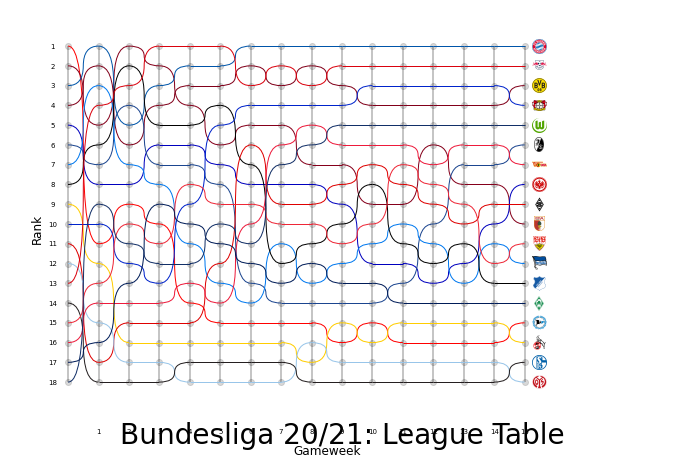

In [41]:
rc('font',**{'family':'sans-serif','sans-serif':['Goldman Sans']})    

fig, ax = plt.subplots(figsize=(12,8))

for team_name, color, img_path in zip(teams, colors, images):
    indices = data[data == team_name].stack().index.tolist()
    coords = [(idx[1], idx[0]) for idx in indices]
    coords = [(int(coord[0]), coord[1]) for coord in coords]
    coords = sorted(coords, key=lambda x: x[0])

    ###
    for p1, p2 in zip(coords[:-1], coords[1:]):
        patch = get_patch(p1, p2, color)
        ax.add_patch(patch)
    
    imscatter(x=15.5, y=coords[-1][-1], image = img_path, ax=ax, zoom=1)
    
ax.set_axis_off()
ax.set(xlim=(-2,20), ylim=(-2,20))
ax.title.set(text='Bundesliga 20/21: League Table', x=.5, y=0, ha='center', va='center', fontweight='light', fontsize=28)
ax.text(8.5, 20.5, 'Gameweek', fontsize=12, va='center', ha='center')
ax.text(-1, 10, 'Rank', rotation=90, fontsize=12, va='bottom', ha='center')
[ax.text(i, 19.5, i, ha='center', va='center', size=7) for i in range(1, 16)]
[ax.text(-0.5, i, i+1, ha='center', va='center', size=7) for i in range(18)]    
for i in range(16):
    for j in range(18):
        ax.scatter(i, j, fc='0.5', alpha=.3, zorder=1)
ax.vlines(x=list(range(16)), ymin=0, ymax=17, fc='0.5', alpha=.3, zorder=1)        
ax.invert_yaxis()

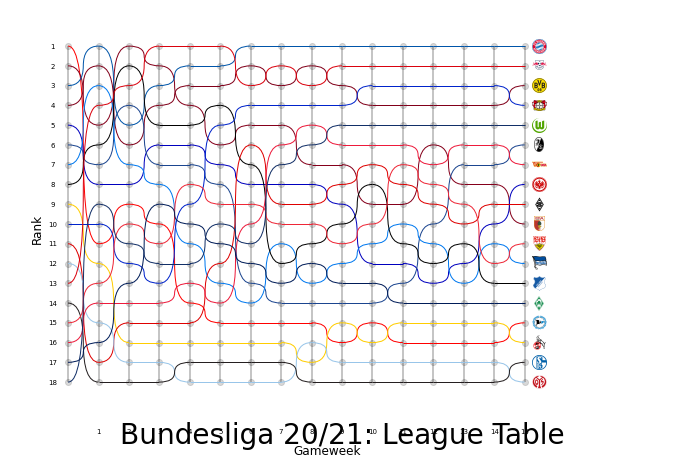

In [42]:
fig

In [43]:
fig.savefig('final.png', dpi=180)